In [3]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical

image_directory='D:/test code/test/Data/Brain tumor dataset/brain_tumor_dataset'

no_tumor_images=os.listdir(image_directory+ '/no')
yes_tumor_images=os.listdir(image_directory+ '/yes')
dataset=[]
label=[]

INPUT_SIZE=64
# print(no_tumor_images)

# path='no0.jpg'

# print(path.split('.')[1])

for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'/no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((64,64))
        dataset.append(np.array(image))
        label.append(0)

for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'/yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((64,64))
        dataset.append(np.array(image))
        label.append(1)

dataset=np.array(dataset)
label=np.array(label)


x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)

# Reshape = (n, image_width, image_height, n_channel)

# print(x_train.shape)
# print(y_train.shape)

# print(x_test.shape)
# print(y_test.shape)

x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)

y_train=to_categorical(y_train , num_classes=2)
y_test=to_categorical(y_test , num_classes=2)



# Model Building
# 64,64,3

model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))


# Binary CrossEntropy= 1, sigmoid
# Categorical Cross Entryopy= 2 , softmax

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


model.fit(x_train, y_train, 
batch_size=16, 
verbose=1, epochs=10, 
validation_data=(x_test, y_test),
shuffle=False)










Epoch 1/10
9/9 [==============================] - 1s 55ms/step - loss: 0.6814 - accuracy: 0.5662 - val_loss: 0.6379 - val_accuracy: 0.4857
Epoch 2/10
9/9 [==============================] - 0s 53ms/step - loss: 0.6370 - accuracy: 0.6250 - val_loss: 0.5740 - val_accuracy: 0.8000
Epoch 3/10
9/9 [==============================] - 1s 58ms/step - loss: 0.5829 - accuracy: 0.7059 - val_loss: 0.4947 - val_accuracy: 0.8286
Epoch 4/10
9/9 [==============================] - 0s 44ms/step - loss: 0.5589 - accuracy: 0.7353 - val_loss: 0.4778 - val_accuracy: 0.7714
Epoch 5/10
9/9 [==============================] - 0s 46ms/step - loss: 0.5198 - accuracy: 0.7647 - val_loss: 0.4580 - val_accuracy: 0.8286
Epoch 6/10
9/9 [==============================] - 0s 53ms/step - loss: 0.4546 - accuracy: 0.8162 - val_loss: 0.4155 - val_accuracy: 0.8286
Epoch 7/10
9/9 [==============================] - 0s 42ms/step - loss: 0.4541 - accuracy: 0.8162 - val_loss: 0.4063 - val_accuracy: 0.8286
Epoch 8/10
9/9 [===========

In [4]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import to_categorical

# Load your data and preprocess it as you did before

# Define the input size
INPUT_SIZE = 64

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

# Normalize your data
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Create a new model
model = Sequential()

# Add a Flatten layer to convert input data to 1D
model.add(Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))

# You can add fully connected layers as needed
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer with 2 classes
model.add(Dense(2))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=16, verbose=1, epochs=10, validation_data=(x_test, y_test), shuffle=False)


Epoch 1/10
9/9 [==============================] - 1s 40ms/step - loss: 1.0665 - accuracy: 0.4926 - val_loss: 1.1126 - val_accuracy: 0.4857
Epoch 2/10
9/9 [==============================] - 0s 27ms/step - loss: 1.0458 - accuracy: 0.5000 - val_loss: 0.6441 - val_accuracy: 0.5714
Epoch 3/10
9/9 [==============================] - 0s 27ms/step - loss: 0.8157 - accuracy: 0.6103 - val_loss: 0.7216 - val_accuracy: 0.6000
Epoch 4/10
9/9 [==============================] - 0s 33ms/step - loss: 0.8377 - accuracy: 0.5735 - val_loss: 0.6569 - val_accuracy: 0.5429
Epoch 5/10
9/9 [==============================] - 0s 26ms/step - loss: 0.6128 - accuracy: 0.6618 - val_loss: 0.6480 - val_accuracy: 0.6000
Epoch 6/10
9/9 [==============================] - 0s 27ms/step - loss: 0.6052 - accuracy: 0.6912 - val_loss: 0.6487 - val_accuracy: 0.5714
Epoch 7/10
9/9 [==============================] - 0s 26ms/step - loss: 0.6362 - accuracy: 0.6544 - val_loss: 0.6388 - val_accuracy: 0.6857
Epoch 8/10
9/9 [===========

In [21]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import to_categorical

# Load your data and preprocess it as you did before

# Define the input size
INPUT_SIZE = 64

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

# Normalize your data
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Load the VGG16 model with pre-trained weights (include_top=False to exclude the final classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(INPUT_SIZE, INPUT_SIZE, 3))

# Create a new model by adding your own classification layers on top of VGG16
model = Sequential()

# Add the VGG16 base model
model.add(base_model)

# Flatten the output of the VGG16 model
model.add(Flatten())

# You can add fully connected layers as needed
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer with 2 classes
model.add(Dense(2))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=16, verbose=1, epochs=10, validation_data=(x_test, y_test), shuffle=False)


58889256/58889256 [==============================] - 81s 1us/step
Epoch 1/10
9/9 [==============================] - 10s 952ms/step - loss: 1.5657 - accuracy: 0.4853 - val_loss: 0.6958 - val_accuracy: 0.5143
Epoch 2/10
9/9 [==============================] - 8s 932ms/step - loss: 0.7777 - accuracy: 0.4853 - val_loss: 0.6959 - val_accuracy: 0.4857
Epoch 3/10
9/9 [==============================] - 9s 973ms/step - loss: 0.7331 - accuracy: 0.4485 - val_loss: 0.6939 - val_accuracy: 0.3429
Epoch 4/10
9/9 [==============================] - 9s 950ms/step - loss: 0.7486 - accuracy: 0.4265 - val_loss: 0.6918 - val_accuracy: 0.5714
Epoch 5/10
9/9 [==============================] - 9s 956ms/step - loss: 0.6975 - accuracy: 0.5147 - val_loss: 0.6927 - val_accuracy: 0.5143
Epoch 6/10
9/9 [==============================] - 9s 961ms/step - loss: 0.6925 - accuracy: 0.5515 - val_loss: 0.6938 - val_accuracy: 0.5143
Epoch 7/10
9/9 [==============================] - 9s 978ms/step - loss: 0.6910 - accuracy: 0.

In [27]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications import Xception
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input

# Load your data and preprocess it as you did before

# Define the input size, you can use 71x71 or larger
INPUT_SIZE = 71

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

# Resize your input images to meet the minimum size requirements
x_train_resized = []
x_test_resized = []
for img in x_train:
    x_train_resized.append(cv2.resize(img, (INPUT_SIZE, INPUT_SIZE)))
for img in x_test:
    x_test_resized.append(cv2.resize(img, (INPUT_SIZE, INPUT_SIZE)))

x_train_resized = np.array(x_train_resized)
x_test_resized = np.array(x_test_resized)

# Normalize your data
x_train_resized = preprocess_input(x_train_resized)
x_test_resized = preprocess_input(x_test_resized)

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Load the Xception model with pre-trained weights (include_top=False to exclude the final classification layer)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(INPUT_SIZE, INPUT_SIZE, 3))

# Create a new model by adding your own classification layers on top of Xception
model = Sequential()

# Add the Xception base model
model.add(base_model)

# Global Average Pooling 2D
model.add(GlobalAveragePooling2D())

# You can add fully connected layers as needed
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer with 2 classes
model.add(Dense(2))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train_resized, y_train, batch_size=16, verbose=1, epochs=10, validation_data=(x_test_resized, y_test), shuffle=False)


83683744/83683744 [==============================] - 90s 1us/step
Epoch 1/10
9/9 [==============================] - 20s 1s/step - loss: 0.6840 - accuracy: 0.6029 - val_loss: 4.0366 - val_accuracy: 0.5143
Epoch 2/10
9/9 [==============================] - 10s 1s/step - loss: 0.4889 - accuracy: 0.8824 - val_loss: 12.1973 - val_accuracy: 0.5143
Epoch 3/10
9/9 [==============================] - 10s 1s/step - loss: 0.4879 - accuracy: 0.8088 - val_loss: 15.1145 - val_accuracy: 0.5143
Epoch 4/10
9/9 [==============================] - 10s 1s/step - loss: 0.4032 - accuracy: 0.8750 - val_loss: 26.5969 - val_accuracy: 0.5143
Epoch 5/10
9/9 [==============================] - 10s 1s/step - loss: 0.3246 - accuracy: 0.9044 - val_loss: 19.2640 - val_accuracy: 0.5143
Epoch 6/10
9/9 [==============================] - 10s 1s/step - loss: 0.2325 - accuracy: 0.9412 - val_loss: 25.7479 - val_accuracy: 0.5429
Epoch 7/10
9/9 [==============================] - 10s 1s/step - loss: 0.1380 - accuracy: 0.9338 - val

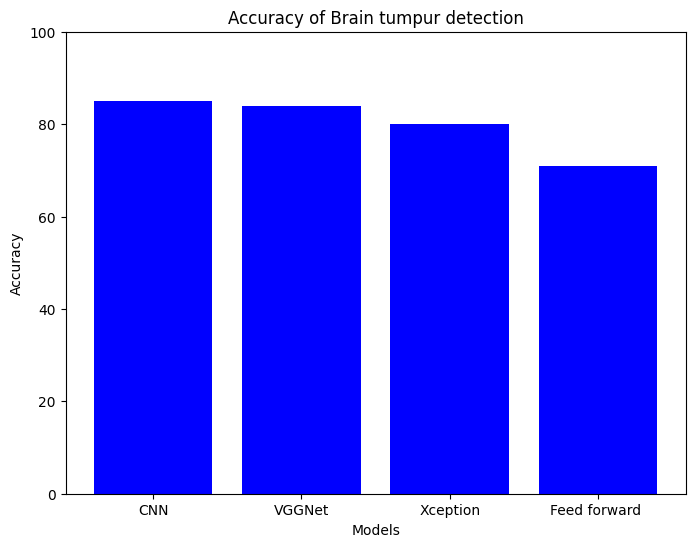

In [37]:
import matplotlib.pyplot as plt

# Create a dictionary to store the accuracy scores for each model
model_accuracies = {
    'CNN': 85,# Replace with the actual accuracy for your CNN model
    'VGGNet': 84,  # Replace with the actual accuracy for your VGGNet model
    'Xception':80, # Replace with the actual accuracy for your Xception model
    'Feed forward ':71
}

# Extract model names and accuracy scores
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Brain tumpur detection')
plt.ylim(0, 100)  # Set the y-axis limits to represent accuracy as a percentage (0 to 100%)
plt.show()


Epoch 1/150
9/9 [==============================] - 1s 60ms/step - loss: 0.6892 - accuracy: 0.5441 - val_loss: 0.6540 - val_accuracy: 0.4857
Epoch 2/150
9/9 [==============================] - 0s 42ms/step - loss: 0.6525 - accuracy: 0.6544 - val_loss: 0.6086 - val_accuracy: 0.6857
Epoch 3/150
9/9 [==============================] - 0s 40ms/step - loss: 0.6316 - accuracy: 0.6324 - val_loss: 0.5569 - val_accuracy: 0.7714
Epoch 4/150
9/9 [==============================] - 0s 43ms/step - loss: 0.5946 - accuracy: 0.6985 - val_loss: 0.5054 - val_accuracy: 0.8286
Epoch 5/150
9/9 [==============================] - 0s 45ms/step - loss: 0.5277 - accuracy: 0.7500 - val_loss: 0.4654 - val_accuracy: 0.8286
Epoch 6/150
9/9 [==============================] - 0s 42ms/step - loss: 0.5115 - accuracy: 0.7794 - val_loss: 0.4581 - val_accuracy: 0.8286
Epoch 7/150
9/9 [==============================] - 0s 44ms/step - loss: 0.4702 - accuracy: 0.7941 - val_loss: 0.4467 - val_accuracy: 0.8571
Epoch 8/150
9/9 [===

9/9 [==============================] - 0s 39ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.0665 - val_accuracy: 0.8000
Epoch 60/150
9/9 [==============================] - 0s 37ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.0647 - val_accuracy: 0.8000
Epoch 61/150
9/9 [==============================] - 0s 37ms/step - loss: 9.1984e-04 - accuracy: 1.0000 - val_loss: 1.0722 - val_accuracy: 0.8000
Epoch 62/150
9/9 [==============================] - 0s 39ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.0815 - val_accuracy: 0.8000
Epoch 63/150
9/9 [==============================] - 0s 37ms/step - loss: 5.3896e-04 - accuracy: 1.0000 - val_loss: 1.0918 - val_accuracy: 0.8000
Epoch 64/150
9/9 [==============================] - 0s 39ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.1228 - val_accuracy: 0.8000
Epoch 65/150
9/9 [==============================] - 0s 37ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.1186 - val_accuracy: 0.9143
Epoch 66/150
9/9 [

Epoch 117/150
9/9 [==============================] - 0s 48ms/step - loss: 2.8764e-04 - accuracy: 1.0000 - val_loss: 1.3550 - val_accuracy: 0.8000
Epoch 118/150
9/9 [==============================] - 0s 56ms/step - loss: 8.7877e-05 - accuracy: 1.0000 - val_loss: 1.3542 - val_accuracy: 0.8000
Epoch 119/150
9/9 [==============================] - 0s 41ms/step - loss: 6.1647e-04 - accuracy: 1.0000 - val_loss: 1.3753 - val_accuracy: 0.8857
Epoch 120/150
9/9 [==============================] - 0s 55ms/step - loss: 7.6466e-05 - accuracy: 1.0000 - val_loss: 1.3977 - val_accuracy: 0.8857
Epoch 121/150
9/9 [==============================] - 0s 41ms/step - loss: 1.1728e-04 - accuracy: 1.0000 - val_loss: 1.4101 - val_accuracy: 0.8857
Epoch 122/150
9/9 [==============================] - 1s 60ms/step - loss: 1.3378e-04 - accuracy: 1.0000 - val_loss: 1.4227 - val_accuracy: 0.8857
Epoch 123/150
9/9 [==============================] - 0s 41ms/step - loss: 2.3124e-04 - accuracy: 1.0000 - val_loss: 1.4179 -

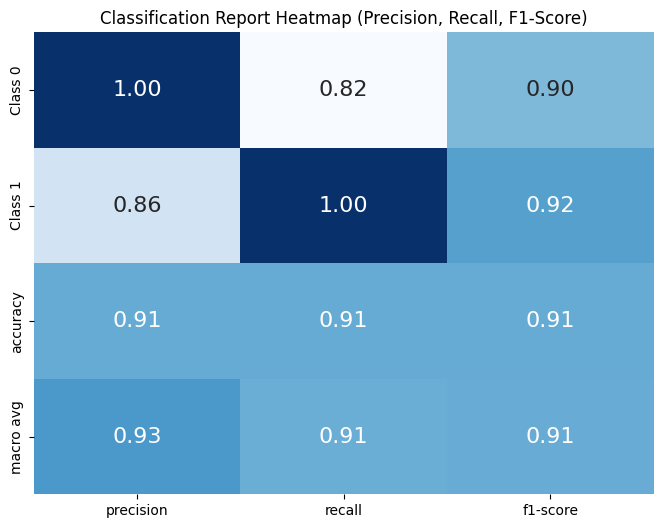

In [2]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize, to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

image_directory = 'D:\project\Personal\Major project src\Integrated-Health-Prognosis-using-Deep-Learning\Data\Brain tumor dataset'

no_tumor_images = os.listdir(image_directory + '/no')
yes_tumor_images = os.listdir(image_directory + '/yes')
dataset = []
label = []

INPUT_SIZE = 64

for i, image_name in enumerate(no_tumor_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_directory + '/no/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((64, 64))
        dataset.append(np.array(image))
        label.append(0)

for i, image_name in enumerate(yes_tumor_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_directory + '/yes/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((64, 64))
        dataset.append(np.array(image))
        label.append(1)

dataset = np.array(dataset)
label = np.array(label)

x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, verbose=1, epochs=150, validation_data=(x_test, y_test), shuffle=False)

# Make predictions
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, pred_labels)
classification_report_str = classification_report(true_labels, pred_labels, target_names=["Class 0", "Class 1"])

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report_str)

# Plot heatmap of classification report
report_data = classification_report(true_labels, pred_labels, target_names=["Class 0", "Class 1"], output_dict=True)
report_df = pd.DataFrame(report_data).transpose()
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap='Blues', cbar=False, fmt=".2f", annot_kws={"size": 16})
plt.title('Classification Report Heatmap (Precision, Recall, F1-Score)')
plt.show()
